In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
import random
rcParams['figure.figsize'] = 6, 4

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

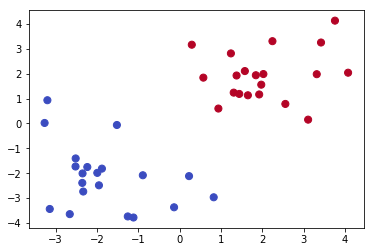

In [26]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

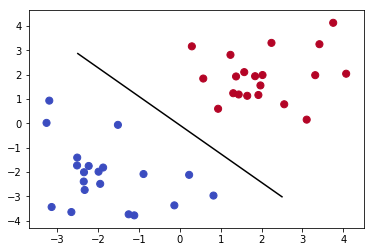

In [27]:
# your code here
from sklearn import svm
clf = svm.SVC(kernel='linear',C=100000)  
clf.fit(X, Y)
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]
plt.gca()
plt.plot(x1, x2, 'k-')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))

plt.show()

#### b. List the support vectors.

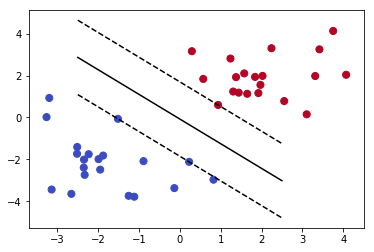

In [29]:
clf = svm.SVC(kernel='linear',C=10**100)  
clf.fit(X, Y)

# get the separating hyperplane w[0] x1 + w[1] x2 + intercept = 0
# transform to slope-intercept form: x2 = (-w[0]/w[1])x1 - (intercept/w[1])
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane (slope = a) that go through the support vectors.

b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
#plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,s=100)
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))


plt.axis('tight')
plt.show()

In [33]:
clf.support_vectors_

array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

In [ ]:
# your code here

#### d. Compute the width of the margin.

In [ ]:
# your code here

#### e. What would you expect to happen to the margin if the constant C was made very small?

Your answer here.  You can justify your intuitions with code if you'd like, but this is not required.

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

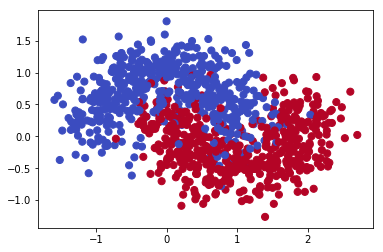

In [14]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [35]:
# your code here
clf = svm.SVC(kernel='linear', C=1) 
clf.fit(X_train, Y_train)

correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

print "Out of sample, we successfully predict {} percent of the data".format((correct)*100)

Out of sample, we successfully predict 86.9696969697 percent of the data


In [37]:
# your code here
clf = svm.SVC(kernel='linear', C=1) 
clf.fit(X_train, Y_train)

correct=1.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)

print "In sample, we successfully predict {} percent of the data".format((correct)*100)

In sample, we successfully predict 83.8805970149 percent of the data


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


              0         1
0      0.000335  0.770270
1      0.000465  0.770270
2      0.000645  0.770270
3      0.000893  0.770270
4      0.001238  0.770270
5      0.001717  0.770270
6      0.002380  0.774775
7      0.003299  0.779279
8      0.004572  0.792793
9      0.006338  0.792793
10     0.008785  0.797297
11     0.012178  0.806306
12     0.016880  0.810811
13     0.023398  0.815315
14     0.032433  0.819820
15     0.044957  0.819820
16     0.062318  0.819820
17     0.086382  0.819820
18     0.119738  0.819820
19     0.165975  0.819820
20     0.230066  0.819820
21     0.318907  0.824324
22     0.442053  0.828829
23     0.612751  0.837838
24     0.849366  0.837838
25     1.177349  0.828829
26     1.631983  0.828829
27     2.262175  0.828829
28     3.135715  0.828829
29     4.346573  0.828829
30     6.025005  0.828829
31     8.351565  0.828829
32    11.576528  0.828829
33    16.046812  0.828829
34    22.243299  0.828829
35    30.832565  0.828829
36    42.738581  0.828829
37    59.242

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/Wagner/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


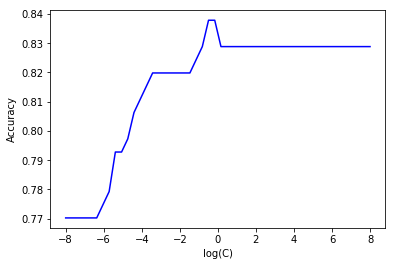

In [45]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# your code here
# polynominals of degree of 1
C = [np.exp(i) for i in np.linspace(-8,8,50)] 
OS_validation=[]
for c in C:
    clf = svm.SVC(kernel='linear',C=c) 
    clf.fit(X_train_1, Y_train_1)
    correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
    OS_validation.append(correct)
    
temp=pd.DataFrame([C,OS_validation]).T # put results together.
print temp

C=[np.log(y) for y in C] # for a better graph
plt.gca()
plt.plot(C,OS_validation,'b',)
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.show()

              0         1
0      0.000335  0.711712
1      0.000465  0.711712
2      0.000645  0.711712
3      0.000893  0.711712
4      0.001238  0.711712
5      0.001717  0.711712
6      0.002380  0.711712
7      0.003299  0.711712
8      0.004572  0.711712
9      0.006338  0.702703
10     0.008785  0.711712
11     0.012178  0.711712
12     0.016880  0.702703
13     0.023398  0.707207
14     0.032433  0.702703
15     0.044957  0.693694
16     0.062318  0.702703
17     0.086382  0.684685
18     0.119738  0.684685
19     0.165975  0.675676
20     0.230066  0.671171
21     0.318907  0.680180
22     0.442053  0.738739
23     0.612751  0.729730
24     0.849366  0.738739
25     1.177349  0.738739
26     1.631983  0.738739
27     2.262175  0.743243
28     3.135715  0.743243
29     4.346573  0.738739
30     6.025005  0.738739
31     8.351565  0.738739
32    11.576528  0.738739
33    16.046812  0.729730
34    22.243299  0.725225
35    30.832565  0.725225
36    42.738581  0.725225
37    59.242

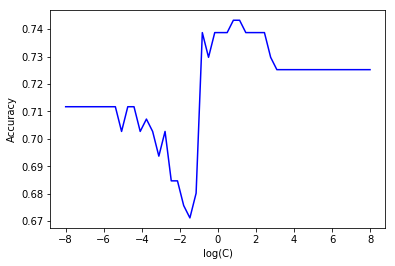

In [46]:
# polynominals of degree of 2
C = [np.exp(i) for i in np.linspace(-8,8,50)] 
OS_validation=[]
for c in C:
    clf = svm.SVC(kernel='poly',C=c, degree=2) 
    clf.fit(X_train_1, Y_train_1)
    correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
    OS_validation.append(correct)
    
temp=pd.DataFrame([C,OS_validation]).T # put results together.
print temp

C=[np.log(y) for y in C] # for a better graph
plt.gca()
plt.plot(C,OS_validation,'b',)
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.show()

              0         1
0      0.000335  0.666667
1      0.000465  0.666667
2      0.000645  0.666667
3      0.000893  0.666667
4      0.001238  0.666667
5      0.001717  0.666667
6      0.002380  0.689189
7      0.003299  0.716216
8      0.004572  0.725225
9      0.006338  0.729730
10     0.008785  0.729730
11     0.012178  0.734234
12     0.016880  0.729730
13     0.023398  0.734234
14     0.032433  0.738739
15     0.044957  0.761261
16     0.062318  0.765766
17     0.086382  0.770270
18     0.119738  0.779279
19     0.165975  0.792793
20     0.230066  0.792793
21     0.318907  0.792793
22     0.442053  0.792793
23     0.612751  0.806306
24     0.849366  0.815315
25     1.177349  0.815315
26     1.631983  0.824324
27     2.262175  0.819820
28     3.135715  0.833333
29     4.346573  0.828829
30     6.025005  0.864865
31     8.351565  0.864865
32    11.576528  0.869369
33    16.046812  0.869369
34    22.243299  0.869369
35    30.832565  0.873874
36    42.738581  0.873874
37    59.242

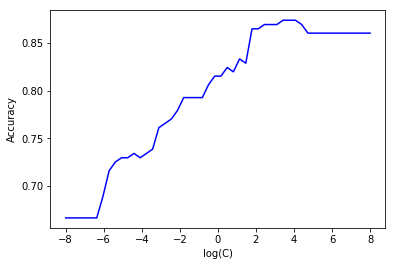

In [48]:
# polynominals of degree of 3
C = [np.exp(i) for i in np.linspace(-8,8,50)] 
OS_validation=[]
for c in C:
    clf = svm.SVC(kernel='poly',C=c, degree=3) 
    clf.fit(X_train_1, Y_train_1)
    correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
    OS_validation.append(correct)
    
temp=pd.DataFrame([C,OS_validation]).T # put results together.
print temp

C=[np.log(y) for y in C] # for a better graph
plt.gca()
plt.plot(C,OS_validation,'b',)
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.show()

              0         1
0      0.000335  0.581081
1      0.000465  0.581081
2      0.000645  0.581081
3      0.000893  0.590090
4      0.001238  0.621622
5      0.001717  0.626126
6      0.002380  0.653153
7      0.003299  0.675676
8      0.004572  0.675676
9      0.006338  0.689189
10     0.008785  0.707207
11     0.012178  0.716216
12     0.016880  0.711712
13     0.023398  0.711712
14     0.032433  0.707207
15     0.044957  0.711712
16     0.062318  0.711712
17     0.086382  0.716216
18     0.119738  0.711712
19     0.165975  0.711712
20     0.230066  0.711712
21     0.318907  0.711712
22     0.442053  0.711712
23     0.612751  0.711712
24     0.849366  0.716216
25     1.177349  0.711712
26     1.631983  0.716216
27     2.262175  0.711712
28     3.135715  0.693694
29     4.346573  0.680180
30     6.025005  0.680180
31     8.351565  0.716216
32    11.576528  0.702703
33    16.046812  0.698198
34    22.243299  0.698198
35    30.832565  0.684685
36    42.738581  0.693694
37    59.242

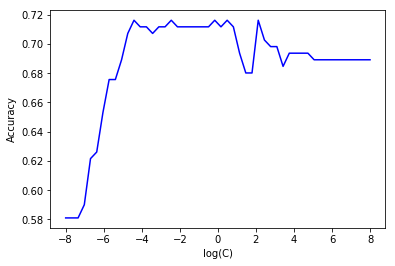

In [49]:
# polynominals of degree of 4
C = [np.exp(i) for i in np.linspace(-8,8,50)] 
OS_validation=[]
for c in C:
    clf = svm.SVC(kernel='poly',C=c, degree=4) 
    clf.fit(X_train_1, Y_train_1)
    correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
    OS_validation.append(correct)
    
temp=pd.DataFrame([C,OS_validation]).T # put results together.
print temp

C=[np.log(y) for y in C] # for a better graph
plt.gca()
plt.plot(C,OS_validation,'b',)
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.show()

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [50]:
# your code here
clf = svm.SVC(kernel='poly',C=50, degree=3)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "Out of sample, we successfully predict {} percent of the data using a linear kernel".format((correct)*100)

Out of sample, we successfully predict 87.8787878788 percent of the data using a linear kernel


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:

P(Yes) = 6/11

P(No) = 5/11

P(Red|Yes) = 5/7

P(SUV|Yes) = 2/5

P(Domestic|Yes) = 4/7

P(Red|No) = 2/7

P(SUV|No) = 3/5

P(Domestic|No) = 3/7

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.

## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [51]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print X_train.head()

   t_pre    glu  blood_p  triceps  serum   b_m  pedigree_f   age
0    3.0  158.0     64.0     13.0  387.0  31.2       0.295  24.0
1    0.0   84.0     64.0     22.0   66.0  35.8       0.545  21.0
2    9.0  120.0     72.0     22.0   56.0  20.8       0.733  48.0
3    4.0  110.0     76.0     20.0  100.0  28.4       0.118  27.0
4    2.0  100.0     66.0     20.0   90.0  32.9       0.867  28.0


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [52]:
# your code here
def trainGaussianNaiveBayes(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_mu1'] = X_1[j].mean()
        nbc[j+'_sigma1'] = X_1[j].std()
        nbc[j+'_mu0'] = X_0[j].mean()
        nbc[j+'_sigma0'] = X_0[j].std()
    return nbc

def testGaussianNaiveBayes(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            pdf1 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu1'],scale=nbc[j+'_sigma1'])
            pdf0 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu0'],scale=nbc[j+'_sigma0'])
            y_pred[i] = y_pred[i]*pdf1/pdf0 if pdf0 > 0 else 1E10
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [55]:
naive_bayes_classifier = trainGaussianNaiveBayes(X_train,y_train)
for i,j in naive_bayes_classifier.items():
    print i
    print j
    print
y_pred_train = testGaussianNaiveBayes(X_train,naive_bayes_classifier)
y_pred_test = testGaussianNaiveBayes(X_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print 'In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train)
print 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test)

b_m_sigma0
6.33761340575

b_m_sigma1
6.25849057084

pedigree_f_sigma1
0.439042023261

pedigree_f_sigma0
0.291750327733

age_mu1
35.7887323944

age_mu0
28.3939393939

glu_sigma1
30.626457178

serum_mu0
127.006060606

serum_mu1
209.211267606

blood_p_mu1
74.5633802817

blood_p_mu0
69.2060606061

serum_sigma0
91.4861376258

serum_sigma1
126.921000794

t_pre_mu0
2.69090909091

t_pre_mu1
4.07042253521

b_m_mu0
31.7090909091

b_m_mu1
35.223943662

blood_p_sigma1
13.7993088796

blood_p_sigma0
11.7132908509

t_pre_sigma0
2.6100606988

t_pre_sigma1
3.51861963057

triceps_sigma0
10.4369185248

triceps_sigma1
9.76269745354

glu_sigma0
24.6918899822

triceps_mu0
27.2

triceps_mu1
33.4788732394

age_sigma1
10.2635492231

age_sigma0
8.53736191168

glu_mu0
111.466666667

glu_mu1
144.14084507

prior
0.300847457627

pedigree_f_mu1
0.639042253521

pedigree_f_mu0
0.468684848485

In sample prediction accuracy: 0.762711864407
Out of sample prediction accuracy: 0.791139240506


### b) What is the prior probability of diabetes, learned from the training data?

In [ ]:
# your code here

### c) What is the mean and variance of each input variable for patients with diabetes?

In [ ]:
# your code here

### d) What is the mean and variance of each input variable for patients without diabetes?

In [ ]:
# your code here

## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [56]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print X_Labeled_train
print y_Labeled_train

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6
0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [60]:
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [65]:
# your code here
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)
for i,j in naive_bayes_classifier.items():
    print i
    print j
    print
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test)

2_0
6    0.6
4    0.2
2    0.2
Name: 2, dtype: float64

2_1
2    0.50
6    0.25
1    0.25
Name: 2, dtype: float64

prior
0.444444444444

1_1
2    0.50
3    0.25
1    0.25
Name: 1, dtype: float64

1_0
6    0.6
4    0.2
1    0.2
Name: 1, dtype: float64

0_0
6    0.4
4    0.2
3    0.2
2    0.2
Name: 0, dtype: float64

0_1
1    0.50
5    0.25
2    0.25
Name: 0, dtype: float64

Out of sample prediction accuracy: 0.694444444444


### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [69]:
# your code here
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print 'Iteration',t,'of',num_iters
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled]) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled])
        X_for_M_step = X_for_M_step.reset_index()
        y_for_M_step = y_for_M_step.reset_index()
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [70]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50)
for i,j in naive_bayes_classifier.items():
    print i
    print j
    print
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test)

Iteration 1 of 50
Iteration 2 of 50


ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>